In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Loading the Dataset

In [2]:
main_df = pd.read_csv("./train.csv")
main_df.head()
main_df.shape

(442905, 434)

In [3]:
main_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,4.429050e+05,442905.000000,4.429050e+05,442905.000000,442905.000000,436201.000000,441724.000000,439730.000000,393811.000000,393811.000000,...,104324.000000,33788.000000,104289.000000,104244.000000,3865.000000,3870.000000,3552.000000,3842.000000,3865.000000,58109.000000
mean,3.282059e+06,0.034989,7.366857e+06,135.273690,9901.266082,362.542367,153.188550,199.276736,290.654596,86.799658,...,189.429604,14.233278,353.493475,403.862774,370.234670,16.025581,12.851351,328.556221,149.187581,26.498202
std,1.705119e+05,0.183753,4.617568e+06,232.955213,4901.960786,157.784513,11.314301,41.232396,101.745146,2.684822,...,30.360205,1.561150,141.183369,152.298443,198.839627,6.947584,2.417639,97.420034,32.180887,3.733750
min,2.987002e+06,0.000000,8.646900e+04,0.251000,1001.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134224e+06,0.000000,3.021834e+06,43.744000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282155e+06,0.000000,7.301614e+06,68.950000,9680.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429574e+06,0.000000,1.123641e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,500.000000,14.000000,15.000000,367.750000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,6085.230000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,660.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [4]:
useless = ["TransactionID", "TransactionDT"]
main_df = main_df.drop(useless, axis = 1)
main_df.shape

(442905, 432)

Checking for Null values

In [5]:
main_df.isnull().sum()

isFraud                0
TransactionAmt         0
ProductCD              0
card1                  0
card2               6704
                   ...  
id_36             337369
id_37             337369
id_38             337369
DeviceType        337504
DeviceInfo        353982
Length: 432, dtype: int64

We find that there are a lot of columns which have a high number of null values. So we are dropping the columns which have greater than 70% null values

In [6]:
l = []
for col in main_df.columns:
    if main_df[col].isnull().sum()*100/main_df.shape[0] > 70:
        l.append(col)
        # df = main_df.drop(col, axis = 1)


In [7]:
new_df = main_df.drop(l, axis = 1)
new_df.shape

(442905, 224)

Segregating the categorical and numerical columns

In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

categorical = new_df.select_dtypes(include = 'object').columns
numerical = new_df.select_dtypes(include = numerics).columns

Filling the missing values in numerical columns by their mean and categorical columns with their mode

In [9]:
new_df[categorical] = new_df[categorical].fillna(new_df[categorical].mode().iloc[0]) #Filling categorical with most occuring value
new_df[numerical] = new_df[numerical].fillna(new_df[numerical].mean())

Checking if null values still exist

In [10]:
for i in new_df.columns:
  if new_df[i].isnull().sum()>0:
    print(i)

One hot encoding the categorical data

In [11]:
df = pd.get_dummies(new_df, columns = categorical)
df.shape

(442905, 302)

Segregating the data into features and labels

In [12]:
X=df.drop("isFraud", axis = 1)
Y=df["isFraud"]

Standardisation of data

In [13]:
cols = X.select_dtypes(include=np.number).columns  
for i in cols:
    X[i] = (X[i] - X[i].mean())/X[i].std()
X.describe()

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C2,...,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
count,4.429050e+05,4.429050e+05,4.429050e+05,4.429050e+05,4.429050e+05,4.429050e+05,4.429050e+05,4.429050e+05,4.429050e+05,4.429050e+05,...,4.429050e+05,4.429050e+05,4.429050e+05,4.429050e+05,4.429050e+05,4.429050e+05,4.429050e+05,4.429050e+05,4.429050e+05,4.429050e+05
mean,-6.577540e-18,1.055936e-16,3.311390e-16,1.076679e-15,-9.105481e-17,8.578355e-16,1.737010e-14,-4.618716e-17,1.197594e-17,1.820855e-18,...,1.885027e-17,2.005347e-18,8.398395e-18,-8.398395e-18,6.001604e-17,-4.716577e-17,-6.742780e-17,6.742780e-17,4.503208e-17,-1.497914e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.796079e-01,-1.815654e+00,-1.676668e+00,-4.707282e+00,-2.416413e+00,-1.987216e+00,-3.033578e+01,-5.020062e-01,-1.048441e-01,-9.819295e-02,...,-2.120484e+00,-4.715894e-01,-1.433240e+00,-6.977185e-01,-4.121756e+00,-2.426145e-01,-2.375548e+00,-4.209545e-01,-2.643838e-01,-3.782371e+00
25%,-3.929068e-01,-7.919823e-01,-9.422461e-01,-2.821924e-01,-8.099615e-01,-8.927881e-01,7.913499e-02,-4.469940e-01,-9.748876e-02,-9.183342e-02,...,4.715894e-01,-4.715894e-01,-1.433240e+00,-6.977185e-01,2.426145e-01,-2.426145e-01,4.209545e-01,-4.209545e-01,-2.643838e-01,2.643838e-01
50%,-2.847058e-01,-4.513828e-02,-9.849979e-03,-2.821924e-01,6.504489e-01,5.924858e-16,7.913499e-02,-6.013625e-17,-9.748876e-02,-9.183342e-02,...,4.715894e-01,-4.715894e-01,6.977185e-01,-6.977185e-01,2.426145e-01,-2.426145e-01,4.209545e-01,-4.209545e-01,-2.643838e-01,2.643838e-01
75%,-4.410157e-02,8.736777e-01,9.544775e-01,-2.821924e-01,6.504489e-01,3.788325e-01,7.913499e-02,-6.013625e-17,-8.277810e-02,-7.911436e-02,...,4.715894e-01,-4.715894e-01,6.977185e-01,1.433240e+00,2.426145e-01,-2.426145e-01,4.209545e-01,-4.209545e-01,-2.643838e-01,2.643838e-01
max,2.554120e+01,1.732926e+00,1.516470e+00,6.886453e+00,9.181908e-01,2.598957e+00,6.004119e+00,4.302539e+01,3.435488e+01,3.609390e+01,...,4.715894e-01,2.120484e+00,6.977185e-01,1.433240e+00,2.426145e-01,4.121756e+00,4.209545e-01,2.375548e+00,3.782371e+00,2.643838e-01


Checking for skew

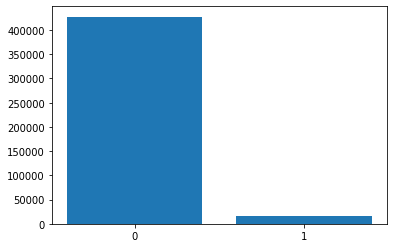

In [22]:
_, counts = np.unique(Y, return_counts=True)
plt.bar([0,1], counts)
plt.xticks([0,1])
plt.show()

We notice that there is a very huge bias. Applied sampling to get rid of this

In [18]:
from imblearn import over_sampling, under_sampling
from imblearn.pipeline import Pipeline

oversampling = over_sampling.RandomOverSampler(sampling_strategy = 0.1)
undersampling = under_sampling.RandomUnderSampler(sampling_strategy = 0.5)
steps = [('o',oversampling), ('u',undersampling)]
pipeline = Pipeline(steps=steps)
X_train, Y_train = pipeline.fit_resample(X, Y.ravel())

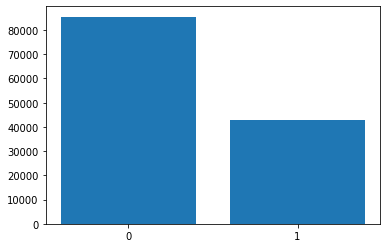

In [23]:
_, counts = np.unique(Y_train, return_counts=True)
plt.bar([0,1], counts)
plt.xticks([0,1])
plt.show()

Outlier Detection and removal

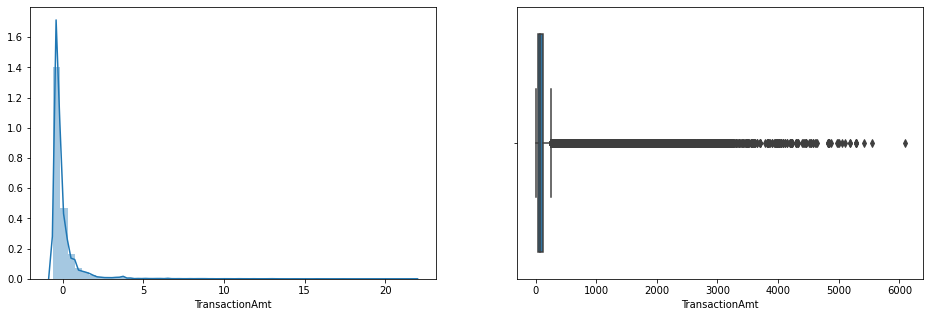

In [19]:
import seaborn as sns
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X_train['TransactionAmt'])
plt.subplot(1,2,2)
sns.boxplot(df['TransactionAmt'])
plt.show()

In [20]:
print(X_train.shape)
data = X_train['TransactionAmt']
mean = data.mean()
std = data.std()
z_score_outlier = [i for i in data if (i-mean)/std > 3]
X_train = X_train[(X_train['TransactionAmt'] - mean)/std <=3]
# print((z_score_outlier))
print(X_train.shape)

(128220, 301)
(125586, 301)


### Feature Selection

Building the correlation matrix to check for highly correlated features

In [27]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [28]:
corr_features = correlation(X, 0.8)
len(set(corr_features))

131

We are removing the 132 columns which have a correlation of greater than 80% with the other columns

In [29]:
X = X.drop(corr_features,axis=1)
X.shape

(442905, 170)

Performing the same calculations on the test data

In [30]:
test_df = pd.read_csv("./test.csv")

newtest_df = test_df.drop(l, axis = 1)
newtest_df.shape

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

categorical = newtest_df.select_dtypes(include = 'object').columns
numerical = newtest_df.select_dtypes(include = numerics).columns

newtest_df[categorical] = newtest_df[categorical].fillna(newtest_df[categorical].mode().iloc[0]) #Filling categorical with most occuring value
newtest_df[numerical] = newtest_df[numerical].fillna(newtest_df[numerical].mean())

df = pd.get_dummies(newtest_df, columns = categorical)

cols = df.select_dtypes(include=np.number).columns  
for i in cols:
    df[i] = (df[i] - df[i].mean())/df[i].std()

df = df.drop(corr_features,axis=1)

df.head()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,M1_F,M2_F,M3_F,M4_M0,M4_M1,M5_F,M6_F,M7_F,M8_F,M9_F
0,1.043602,1.052206,0.742402,0.620735,-0.010183,-0.282236,0.649534,-1.721420,7.700475e-02,-0.398959,...,-0.006886,-0.247506,-0.361254,0.488115,-0.313454,-2.114371,-1.433913,0.243754,0.422554,-0.265125
1,0.775706,0.740556,-0.377719,0.895087,-1.184970,2.791231,-1.514394,0.000000,5.570492e-15,0.000000,...,-0.006886,-0.247506,-0.361254,-2.048684,-0.313454,0.472951,0.697388,0.243754,0.422554,-0.265125
2,0.738326,0.714141,-0.133474,1.350300,1.222067,-0.282236,0.649534,0.083771,7.700475e-02,0.000000,...,-0.006886,-0.247506,-0.361254,0.488115,-0.313454,0.472951,0.697388,0.243754,0.422554,-0.265125
3,0.624538,0.600527,-0.297166,-0.079844,-0.265571,-0.282236,0.649534,1.565488,7.700475e-02,0.749756,...,-0.006886,-0.247506,-0.361254,0.488115,-0.313454,0.472951,0.697388,0.243754,0.422554,3.771775
4,0.489748,0.455722,-0.389394,1.223535,1.164605,2.791231,-1.490080,-0.072749,-1.050669e+01,0.000000,...,-0.006886,-0.247506,-0.361254,-2.048684,-0.313454,0.472951,0.697388,0.243754,0.422554,-0.265125
